# 주요 개념 및 용어

## AI Agent
- 목표를 달성하기 위해 여러 번에 걸쳐 반복적으로 계획을 세우고 행동을 취할 수 있는 언어 모델(Language Model) 기반의 개체를 말합니다.
- 이 때, 각각의 에이전트는 서로 다른 역할을 수행하도록 별도의 페르소나(Persona)가 주어집니다.
- 이 페르소나는 일종의 역할(role)과 같은 것으로, 에이전트에 대한 설명을 비롯하여 접근 가능한 도구들을 정의하는 역할 등을 포함하고 있습니다.

## Single-Agent Architecture
- 하나의 언어 모델이 모든 추론(reasoning), 계획(planning), 실행(execution)을 담당하는 구조를 말합니다.
- 이 경우, 에이전트는 다른 에이전트와의 상호작용 없이 독립적으로 작업을 수행합니다.

## Multi-Agent Architecture
- 두 개 이상의 에이전트가 협업하여 작업을 수행하는 구조를 말합니다.
- 각 에이전트는 고유한 페르소나를 가지며, 동일하거나 서로 다른 언어 모델과 도구를 사용할 수 있습니다.
- 다중 에이전트 시스템은 다시 Supervisor과 Network으로 나눌 수 있습니다.
  - `Supervisor`
    - 하나의 리드 에이전트(Lead Agent)가 다른 에이전트들을 관리하고 지시하는 구조입니다.
    - 이 경우, 주도 에이전트를 중심으로 의사소통이 이루어집니다.
  - `Network`
    - 모든 에이전트가 동등한 지위를 가지며, 그룹 토론을 통해 정보를 공유하고 협업하는 구조입니다.

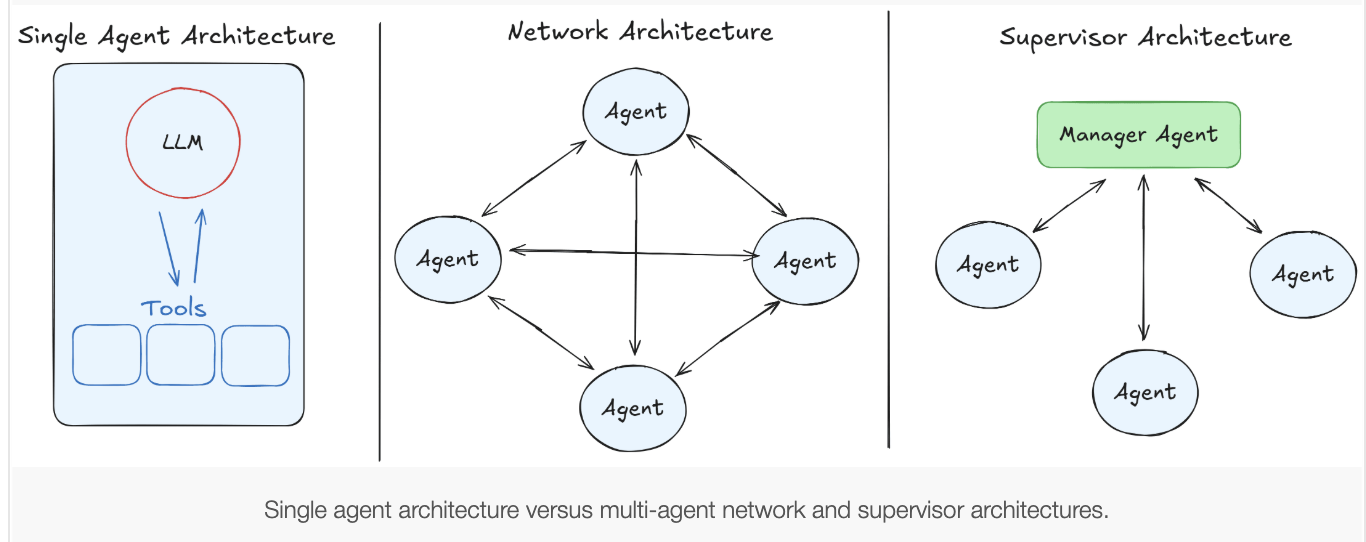

# AI Agent의 구조

## LLM
- 사람으로 치면 두뇌이다.
- 텍스트를 처리하고 의사결정을 한다.

## Planning
- AI Agent는 복잡한 objective를 작은 task로 나눌 줄 아는 능력이 중요하다.
- 이는 planning module을 통해 수행되며, 다음과 같은 동작들을 수행한다.
  - 주어진 objective 분석
  - 목표 달성 위해 필요한 단계 파악
  - 단계들의 우선 순위 선정
  - 새 정보들이 들어오면 계획을 수정하기

## Action
- AI Agent가 task를 수행하기 위해 tool과 interact하는 component.
- 웹 검색, 코드 실행, DB 접근, API 사용, 다른 SW와 interact 등
- 이런 tool들을 얼마나 잘 쓰는지가 AI Agent가 얼마나 넓은 범위의 작업을 할 수 있느지를 결정한다.

## Profile
- AI Agent의 행동, 성격, 기능을 정의한다.
- chat_template에서 role system과 비슷한 역할

## Memory
- Memory를 통해 Agent는 과거 정보를 저장하고 불러오는 것은 아래 상황에서 중요함
  - 진행 중인 대화에서 context 유지하기
  - 과거 경험으로부터 학습하기
  - 점진적으로 성능을 향상시킴
  - user history에 따라 personalized된 응답 제공

# Setup

## Install

In [1]:
!pip install -U langchain langfuse langgraph langgraph-checkpoint-sqlite langchain_community langchain_anthropic langchain_experimental langchain_openai pymupdf faiss-cpu tavily-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.6/91.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/4

## OpenAI Key 등록
- [OpenAI Key 발급방법](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = 'sk-'


## TAVILY API KEY

In [ ]:
# TAVILY API KEY를 기입합니다.
os.environ["TAVILY_API_KEY"] = "tvly-"

## [Langsmith](https://smith.langchain.com/o/9b0045e0-4ff2-5e75-ab7d-5e8ee81fb8d1/settings)

In [ ]:
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "Multi Agent TUTORIAL"
os.environ["LANGCHAIN_API_KEY"] = "lsv2_"

## 구글 드라이브 연결

In [5]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/5. Large Language Models/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


# [예제: 멀티 에이전트 감독자(Multi-Agent Supervisor)](https://wikidocs.net/270690)

## 상태 정의

In [6]:
import operator
from typing import Sequence, Annotated
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage


# 상태 정의
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지
    next: str  # 다음으로 라우팅할 에이전트


## 에이전트 생성

### TavilySearchResults

In [7]:
from langchain_community.tools import TavilySearchResults

# 최대 검색 결과를 3으로 설정
tavily_tool = TavilySearchResults(max_results=3)

In [8]:
result = tavily_tool.invoke({"query": "LangChain Tools 에 대해서 알려주세요"})
len(result)

3

In [9]:
result

[{'title': 'Tools | 🦜️   LangChain',
  'url': 'https://python.langchain.com/docs/concepts/tools/',
  'content': "Overview\u200b\nThe tool abstraction in LangChain associates a Python function with a schema that defines the function's name, description and expected arguments.\nTools can be passed to chat models that support tool calling allowing the model to request the execution of a specific function with specific inputs.\nKey concepts\u200b [...] For more details on how to create tools, see the how to create custom tools guide.\nnote\nLangChain has a few other ways to create tools; e.g., by sub-classing the BaseTool class or by using StructuredTool. These methods are shown in the how to create custom tools guide, but we generally recommend using the @tool decorator for most cases.\nUse the tool directly\u200b\nOnce you have defined a tool, you can use it directly by calling the function. For example, to use the multiply tool defined above: [...] Tools are utilities that can be called

### PythonREPLTool

In [10]:
from langchain_experimental.tools import PythonREPLTool

# 로컬에서 코드를 실행하는 Python REPL 도구 초기화 (안전하지 않을 수 있음)
python_repl_tool = PythonREPLTool()


In [11]:
python_repl_tool.run("print(1+1)")

'2\n'

In [12]:
from langchain_core.messages import HumanMessage


# 지정한 agent와 name을 사용하여 agent 노드를 생성
def agent_node(state:AgentState, agent, name):
    # agent 호출
    agent_response = agent.invoke(state)
    # agent의 마지막 메시지를 HumanMessage로 변환하여 반환
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }


- `functools.partial`은 기존 함수의 일부 인자 또는 키워드 인자를 미리 고정하여 새 함수를 생성하는 데 사용됩니다.

즉, 자주 사용하는 함수 호출 패턴을 간소화할 수 있도록 도와줍니다.

In [13]:
import functools
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

MODEL_NAME = "gpt-4o-mini"

# Research Agent 생성
research_agent = create_react_agent(ChatOpenAI(model=MODEL_NAME), tools=[tavily_tool])

# research node 생성
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")


In [14]:
result = research_node(
    {
        "messages": [
            HumanMessage(content="Code hello world and print it to the terminal")
        ]
    }
)


In [15]:
print(result['messages'][0].content)

Here's a simple example of how to code "Hello, World!" in Python and print it to the terminal:

```python
print("Hello, World!")
```

To run this code:

1. Open your terminal or command line.
2. Type `python` or `python3` to launch the Python interpreter.
3. Copy and paste the code above, and press Enter.

Alternatively, if you want to create a Python file:

1. Open a text editor and paste the code above.
2. Save the file as `hello.py`.
3. In your terminal, navigate to the directory where the file is saved and run the command:

```bash
python hello.py
```

This will print `Hello, World!` to the terminal.


### Agent Supervisor

In [16]:
from pydantic import BaseModel
from typing import Literal

# 멤버 Agent 목록 정의
members = ["Researcher", "Coder"]

# 다음 작업자 선택 옵션 목록 정의
options_for_next = ["FINISH"] + members


# 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]


In [17]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI


# 시스템 프롬프트 정의: 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with managing a conversation between the"
    " following workers:  {members}. Given the following user request,"
    " respond with the worker to act next. Each worker will perform a"
    " task and respond with their results and status. When finished,"
    " respond with FINISH."
)

# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))

In [18]:
prompt.input_variables

['messages']

In [19]:
prompt.partial_variables

{'options': "['FINISH', 'Researcher', 'Coder']",
 'members': 'Researcher, Coder'}

In [20]:
prompt.input_types

{'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.messages.function.FunctionMessageChunk, Tag(tag='FunctionMessage

In [21]:
# LLM 초기화
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)


# Supervisor Agent 생성
def supervisor_agent(state:AgentState):
    # 프롬프트와 LLM을 결합하여 체인 구성
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    # Agent 호출
    return supervisor_chain.invoke(state)


In [22]:
# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="2010년 ~ 2024년까지의 대한민국의 1인당 GDP 추이를 그래프로 시각화 해주세요."
        )
    ],
}

supervisor_agent(inputs)

RouteResponse(next='Researcher')

## 그래프

### 노드

In [23]:
import functools
from langgraph.prebuilt import create_react_agent


# Research Agent 생성
research_agent = create_react_agent(llm, tools=[tavily_tool])
research_node = functools.partial(agent_node, agent=research_agent, name="Researcher")

In [24]:
code_system_prompt = """
Be sure to use the following font in your code for visualization.

##### 폰트 설정 #####
import platform

# OS 판단
current_os = platform.system()

if current_os == "Windows":
    # Windows 환경 폰트 설정
    font_path = "C:/Windows/Fonts/malgun.ttf"  # 맑은 고딕 폰트 경로
    fontprop = fm.FontProperties(fname=font_path, size=12)
    plt.rc("font", family=fontprop.get_name())
elif current_os == "Darwin":  # macOS
    # Mac 환경 폰트 설정
    plt.rcParams["font.family"] = "AppleGothic"
else:  # Linux 등 기타 OS
    # 기본 한글 폰트 설정 시도
    try:
        plt.rcParams["font.family"] = "NanumGothic"
    except:
        print("한글 폰트를 찾을 수 없습니다. 시스템 기본 폰트를 사용합니다.")

##### 마이너스 폰트 깨짐 방지 #####
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 폰트 깨짐 방지
"""


# Coder Agent 생성
coder_agent = create_react_agent(
    llm,
    tools=[python_repl_tool],
    state_modifier=code_system_prompt,
)
coder_node = functools.partial(agent_node, agent=coder_agent, name="Coder")


In [25]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# 그래프 생성
workflow = StateGraph(AgentState)

# 그래프에 노드 추가
workflow.add_node("Researcher", research_node)
workflow.add_node("Coder", coder_node)
workflow.add_node("Supervisor", supervisor_agent)


# 멤버 노드 > Supervisor 노드로 엣지 추가
for member in members:
    workflow.add_edge(member, "Supervisor")

### 조건부 엣지 추가

In [26]:
# 조건부 엣지 추가 (
conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END


def get_next(state):
    return state["next"]


# Supervisor 노드에서 조건부 엣지 추가
workflow.add_conditional_edges("Supervisor", get_next, conditional_map)

### 그래프 생성

In [27]:
# 시작점
workflow.add_edge(START, "Supervisor")

# 그래프 컴파일
graph = workflow.compile(checkpointer=MemorySaver())


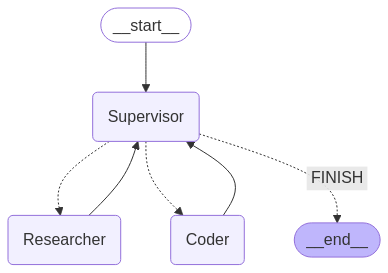

In [28]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

## 테스트


***********************************************
🔄 Node: Supervisor 🔄
{"next":"Researcher"}
***********************************************
🔄 Node: agent 🔄

***********************************************
🔄 Node: tools 🔄
[{"title": "Constant GDP per capita for the Republic of Korea - FRED", "url": "https://fred.stlouisfed.org/series/NYGDPPCAPKDKOR", "content": "Categories > International Data > Countries > Korea, Republic of (South Korea)\nConstant GDP per capita for the Republic of Korea (NYGDPPCAPKDKOR)\nObservations\n2023: 34,121.02118 | 2010 U.S. Dollars | Annual\nUpdated: Jul 2, 2024 2:07 PM CDT\nNext Release Date: Not Available\nObservations\n2023: 34,121.02118\nUpdated: Jul 2, 2024 2:07 PM CDT\nNext Release Date: Not Available\n2023: 34,121.02118 2022: 33,690.37888 2021: 32,771.07242 2020: 31,378.15793 2019: 31,645.94983 View All\nUnits:", "score": 0.8961153}, {"title": "Economy of South Korea - Wikipedia", "url": "https://en.wikipedia.org/wiki/Economy_of_South_Korea", "content"

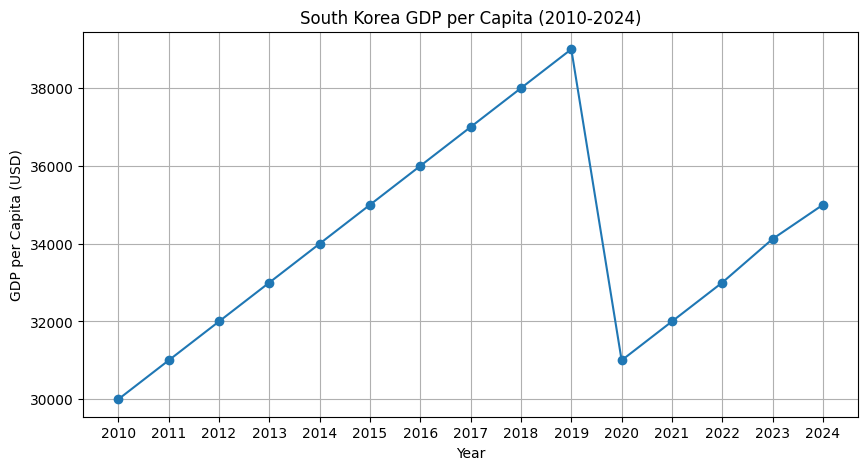


***********************************************
🔄 Node: tools 🔄

***********************************************
🔄 Node: agent 🔄
그래프가 성공적으로 시각화되었습니다. 아래는 2010년부터 2024년까지의 대한민국 1인당 GDP 추이를 나타낸 그래프입니다. 각 연도별 GDP 수치가 점으로 표시되어 있으며, 전체적인 추세를 확인할 수 있습니다. 

이 그래프를 통해 대한민국의 1인당 GDP가 전반적으로 증가하는 추세를 보이고 있음을 알 수 있습니다. 2020년에는 COVID-19의 영향으로 감소했지만, 이후 다시 회복세를 보이고 있습니다.
***********************************************
🔄 Node: Coder 🔄
그래프가 성공적으로 시각화되었습니다. 아래는 2010년부터 2024년까지의 대한민국 1인당 GDP 추이를 나타낸 그래프입니다. 각 연도별 GDP 수치가 점으로 표시되어 있으며, 전체적인 추세를 확인할 수 있습니다. 

이 그래프를 통해 대한민국의 1인당 GDP가 전반적으로 증가하는 추세를 보이고 있음을 알 수 있습니다. 2020년에는 COVID-19의 영향으로 감소했지만, 이후 다시 회복세를 보이고 있습니다.
***********************************************
🔄 Node: Supervisor 🔄
{"next":"FINISH"}

In [30]:
from langfuse.callback import CallbackHandler
import uuid

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

config = {
    "configurable": {"thread_id": str(uuid.uuid4())},
    "callbacks": [langfuse_handler]
}

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="2010년 ~ 2024년까지의 대한민국의 1인당 GDP 추이를 그래프로 시각화 해주세요."
        )
    ],
}
prev_node = ""
for chunk_msg, metadata in graph.stream(inputs, stream_mode="messages",
                              config=config
                            ):
    curr_node = metadata['langgraph_node']
    if curr_node != prev_node:
      print("\n***********************************************")
      print(f"🔄 Node: \033[1;36m{curr_node}\033[0m 🔄")

    print(chunk_msg.content, end="", flush=True)
    prev_node = curr_node

# [예제: 에이전트 대화 시뮬레이션 (고객 응대 시나리오)](https://wikidocs.net/267816)

## 상태(State) 정의

In [ ]:
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import TypedDict


# State 정의
class State(TypedDict):
    messages: Annotated[list, add_messages]  # 사용자 - 상담사 간의 대화 메시지


## 역할 정의


### 상담사 역할
- `call_chatbot` 내의 구현은 설정 가능하며, 내부에서 사용한 모델을 Agent 로 변경하는 것도 가능합니다.
- `call_chatbot` 은 사용자로부터 메시지를 입력으로 받아, 고객을 상담하는 역할을 부여하겠습니다.

고객 지원 시나리오에서의 대화 응답 생성에 활용될 수 있습니다.

In [ ]:
from typing import List
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage, AIMessage, BaseMessage
from langchain_core.output_parsers import StrOutputParser

# 모델 이름 설정
MODEL_NAME = "gpt-4o-mini"


def call_chatbot(messages: List[BaseMessage]) -> dict:
    # LangChain ChatOpenAI 모델을 Agent 로 변경할 수 있습니다.
    prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                # 당신은 항공사의 고객 지원 담당자입니다.
                "You are a customer support agent for an airline. Answer in Korean.",
            ),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )
    model = ChatOpenAI(model=MODEL_NAME, temperature=0.6)
    chain = prompt | model | StrOutputParser()
    return chain.invoke({"messages": messages})


In [ ]:
call_chatbot([("user", "안녕하세요?")])

'안녕하세요! 무엇을 도와드릴까요?'

In [ ]:
from langchain_core.messages import AIMessage


# 상담사 역할
def ai_assistant_node(state:State):
    # 상담사 응답 호출
    ai_response = call_chatbot(state['messages'])

    # AI 상담사의 응답을 반환
    return {"messages": [("assistant", ai_response)]}


In [ ]:
# 입력 메시지 설정
inputs = {
    "messages": [HumanMessage(content="안녕하세요? 저 지금 좀 화가 많이 났습니다!")]
}

ai_assistant_node(inputs)

{'messages': [('assistant',
   '안녕하세요! 불편한 상황에 대해 정말 죄송합니다. 어떤 문제로 화가 나셨는지 말씀해 주시면, 최대한 도와드리겠습니다.')]}

### 고객 역할(Simulated User) 정의

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI


def create_scenario(name: str, instructions: str):
    # 시스템 프롬프트를 정의: 필요에 따라 변경
    system_prompt_template = """You are a customer of an airline company. \
      You are interacting with a user who is a customer support person. \

      Your name is {name}.

      # Instructions:
      {instructions}

      [IMPORTANT]
      - When you are finished with the conversation, respond with a single word 'FINISHED'
      - You must speak in Korean."""

    # 대화 메시지와 시스템 프롬프트를 결합하여 채팅 프롬프트 템플릿을 생성합니다.
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system_prompt_template),
            MessagesPlaceholder(variable_name="messages"),
        ]
    )

    # 특정 사용자 이름과 지시사항을 사용하여 프롬프트를 부분적으로 채웁니다.
    prompt = prompt.partial(name=name, instructions=instructions)
    return prompt


In [ ]:
# 사용자 지시사항을 정의합니다.
instructions = """You are tyring to get a refund for the trip you took to Jeju Island. \
You want them to give you ALL the money back. This trip happened last year."""

# 사용자 이름을 정의합니다.
name = "홍길동"

create_scenario(name, instructions).pretty_print()


================================ System Message ================================

You are a customer of an airline company. \  
      You are interacting with a user who is a customer support person. \  

      Your name is {name}.  

      # Instructions:  
      {instructions}  

      [IMPORTANT]  
      - When you are finished with the conversation, respond with a single word 'FINISHED'  
      - You must speak in Korean.

============================= Messages Placeholder =============================

{messages}


In [ ]:
def call_user(messages: List[BaseMessage]) -> dict:
    # OpenAI 챗봇 모델을 초기화합니다.
    model = ChatOpenAI(model=MODEL_NAME, temperature=0.6)

    # 시뮬레이션된 사용자 대화를 생성합니다.
    chain = create_scenario(name, instructions) | model | StrOutputParser()
    return chain.invoke({"messages": messages})

In [ ]:
from langchain_core.messages import HumanMessage

call_user([HumanMessage(content="안녕하세요? 어떻게 도와 드릴까요?")])


'안녕하세요. 저는 홍길동입니다. 작년에 제주도로 간 여행에 대한 환불을 요청하고 싶습니다. 전액 환불을 받고 싶습니다. 도와주실 수 있나요?'

In [ ]:
def _swap_roles(messages):
    # 메시지의 역할을 교환: 시뮬레이션 사용자 단계에서 메시지 타입을 AI -> Human, Human -> AI 로 교환합니다.
    new_messages = []
    for m in messages:
        if isinstance(m, AIMessage):
            # AIMessage 인 경우, HumanMessage 로 변환합니다.
            new_messages.append(HumanMessage(content=m.content))
        else:
            # HumanMessage 인 경우, AIMessage 로 변환합니다.
            new_messages.append(AIMessage(content=m.content))
    return new_messages

In [ ]:
# 시뮬레이션된 사용자(Simulated User) 노드 정의
def simulated_user_node(state: State):
    # 메시지 타입을 교환: AI -> Human, Human -> AI
    new_messages = _swap_roles(state["messages"])
    # 상담사 응답 호출
    response  = call_user(new_messages)
    # AI 상담사의 응답을 반환
    return {"messages": [("user", response )]}

In [ ]:
# 시뮬레이션된 사용자에게 메시지를 전달
inputs = {
    "messages": [HumanMessage(content="안녕하세요? 어떻게 도와 드릴까요?")]
}

simulated_user_node(inputs)

{'messages': [('user',
   '안녕하세요, 저는 홍길동입니다. 작년에 제주도로 여행을 갔었는데, 그 여행에 대한 환불을 요청하고 싶습니다. 전액 환불받고 싶습니다. 어떻게 진행해야 하나요?')]}

## 그래프 정의

In [ ]:
def should_continue(state: State):
    # 메시지 리스트의 길이가 6보다 크면 'end'를 반환합니다.
    if len(state["messages"]) > 6:
        return "end"
    # 마지막 메시지의 내용이 'FINISHED'라면 'end'를 반환합니다.
    elif state["messages"][-1].content == "FINISHED":
        return "end"
    # 위의 조건에 해당하지 않으면 'continue'를 반환합니다.
    else:
        return "continue"


In [ ]:
from langgraph.graph import START, END, StateGraph

# StateGraph 인스턴스 생성
graph_builder = StateGraph(State)

# 노드 정의
graph_builder.add_node("simulated_user", simulated_user_node)
graph_builder.add_node("ai_assistant", ai_assistant_node)

In [ ]:
# 엣지 정의 (챗봇 -> 시뮬레이션된 사용자)
graph_builder.add_edge("ai_assistant", "simulated_user")

# 조건부 엣지 정의
graph_builder.add_conditional_edges(
    "simulated_user",
    should_continue,
    {
        "end": END,  # 종료 조건이 충족되면 시뮬레이션을 중단
        "continue": "ai_assistant",  # 종료 조건이 충족되지 않으면 상담사 역할 노드로 메시지를 전달
    },
)

In [ ]:
# 시작점 설정
graph_builder.add_edge(
    START,      # 시작 노드
    "ai_assistant"   # 끝 노드
)

In [ ]:
# 그래프 컴파일
simulation = graph_builder.compile()

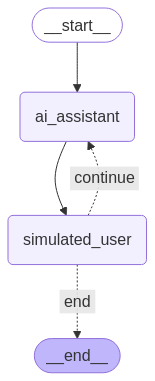

In [ ]:
from IPython.display import Image, display
try:
    display(Image(simulation.get_graph().draw_mermaid_png()))
except Exception:
    pass

## 테스트

In [ ]:
from langfuse.callback import CallbackHandler

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

# 입력 메시지 설정
inputs = {
    "messages": [HumanMessage(content="안녕하세요? 저 지금 좀 화가 많이 났습니다!")]
}
prev_node = ""
for chunk_msg, metadata in simulation.stream(inputs, stream_mode="messages",
                              config={"callbacks": [langfuse_handler]}
                            ):
    curr_node = metadata['langgraph_node']
    if curr_node != prev_node:
      print("\n***********************************************")
      print(f"🔄 Node: \033[1;36m{curr_node}\033[0m 🔄")

    print(chunk_msg.content, end="", flush=True)
    prev_node = curr_node


***********************************************
🔄 Node: ai_assistant 🔄
안녕하세요! 고객님, 불편을 드려서 정말 죄송합니다. 어떤 문제로 화가 나셨는지 말씀해 주시면, 최대한 도움을 드리겠습니다.
***********************************************
🔄 Node: simulated_user 🔄
작년 제주도 여행을 갔었는데, 그에 대한 환불을 받고 싶습니다. 전체 금액을 돌려받고 싶어요. 어떻게 진행할 수 있을까요?
***********************************************
🔄 Node: ai_assistant 🔄
고객님, 제주도 여행에 대한 환불 요청을 하신 것에 대해 이해합니다. 환불 절차는 예약하신 방법에 따라 다를 수 있습니다. 

1. **온라인 예약**: 만약 온라인으로 예약하셨다면, 해당 사이트에 로그인하신 후 '예약 관리' 메뉴에서 환불 요청을 하실 수 있습니다.
   
2. **전화 예약**: 전화로 예약하신 경우, 고객센터로 연락해 주시면 환불 절차를 안내해 드리겠습니다. 고객님의 예약 번호와 관련 정보를 준비해 주시면 더욱 빠르게 진행할 수 있습니다.

환불이 가능한지 여부는 예약 조건에 따라 다를 수 있으니, 자세한 사항은 고객센터에 문의해 주시면 정확한 정보를 제공해 드리겠습니다. 추가로 궁금한 점이 있으시면 언제든지 말씀해 주세요.
***********************************************
🔄 Node: simulated_user 🔄
저는 예약을 온라인으로 했습니다. 그런데 제가 원하는 것은 전체 금액을 환불받는 것이에요. 환불이 가능한지 꼭 확인해 주실 수 있나요?
***********************************************
🔄 Node: ai_assistant 🔄
고객님, 온라인 예약을 하셨군요. 전체 금액 환불 가능 여부는 예약하신 항공권의 종류와 조건에 따라 달라질

# [예제: 사용자 요구사항 기반 메타 프롬프트 생성 에이전트](https://wikidocs.net/267817)

## State 정의

In [ ]:
# State 정의
class State(TypedDict):
    messages: Annotated[list, add_messages]

## 사용자로부터 요구사항 수집

In [ ]:
from typing import List
from langchain_core.messages import SystemMessage
from langchain_openai import ChatOpenAI
from pydantic import BaseModel

In [ ]:
# 사용자 요구사항 수집을 위한 시스템 메시지 템플릿
template = """
Your job is to get information from a user about what type of prompt template they want to create.

You should get the following information from them:

- What the objective of the prompt is
- What variables will be passed into the prompt template
- Any constraints for what the output should NOT do
- Any requirements that the output MUST adhere to

If you are not able to discern this info, ask them to clarify! Do not attempt to wildly guess.

After you are able to discern all the information, call the relevant tool.

[IMPORTANT] Your conversation should be in Korean. Your generated prompt should be in English.
"""

# 사용자 메시지 목록을 받아 시스템 메시지와 결합하여 반환
def get_messages_info(messages):
    # 사용자 요구사항 수집을 위한 시스템 메시지와 기존 메시지 결합
    return [SystemMessage(content=template)] + messages

In [ ]:
# LLM에 대한 프롬프트 지침을 정의하는 데이터 모델
class PromptInstructions(BaseModel):
    """Instructions on how to prompt the LLM."""

    # 프롬프트의 목표
    objective: str
    # 프롬프트 템플릿에 전달될 변수 목록
    variables: List[str]
    # 출력에서 피해야 할 제약 조건 목록
    constraints: List[str]
    # 출력이 반드시 따라야 할 요구 사항 목록
    requirements: List[str]


# 최신 LLM 모델 이름 가져오기
MODEL_NAME = "gpt-4o-mini"
# LLM 초기화
llm = ChatOpenAI(temperature=0, model=MODEL_NAME)
# PromptInstructions 구조체를 바인딩
llm_with_tool = llm.bind_tools([PromptInstructions])


# 상태 정보를 기반으로 메시지 체인을 생성하고 LLM 호출
def info_chain(state:State):
    # 상태에서 메시지 정보를 가져와 시스템 메시지와 결합
    messages = get_messages_info(state["messages"])
    # LLM을 호출하여 응답 생성
    response = llm_with_tool.invoke(messages)
    # 생성된 응답을 메시지 목록으로 반환
    return {
        "messages": [response]
    }


In [ ]:
# 입력 메시지 설정
inputs = {
    "messages": [HumanMessage(content="RAG 프롬프트를 생성하고 싶습니다.")]
}


result = info_chain(inputs)

In [ ]:
result

{'messages': [AIMessage(content='RAG 프롬프트를 생성하기 위해 몇 가지 정보를 더 필요로 합니다. 다음 질문에 답해 주시겠어요?\n\n1. 프롬프트의 목적은 무엇인가요?\n2. 프롬프트 템플릿에 전달될 변수는 무엇인가요?\n3. 출력에서 하지 말아야 할 제약 조건은 무엇인가요?\n4. 출력이 반드시 준수해야 할 요구 사항은 무엇인가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 95, 'prompt_tokens': 197, 'total_tokens': 292, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_86d0290411', 'id': 'chatcmpl-BIwZzdyG74cknpxBOB278Bi1JDaOq', 'finish_reason': 'stop', 'logprobs': None}, id='run-5b7ca60b-3a0a-4de4-9cdf-668fef6d77fe-0', usage_metadata={'input_tokens': 197, 'output_tokens': 95, 'total_tokens': 292, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [ ]:
print(result['messages'][0].content)

RAG 프롬프트를 생성하기 위해 몇 가지 정보를 더 필요로 합니다. 다음 질문에 답해 주시겠어요?

1. 프롬프트의 목적은 무엇인가요?
2. 프롬프트 템플릿에 전달될 변수는 무엇인가요?
3. 출력에서 하지 말아야 할 제약 조건은 무엇인가요?
4. 출력이 반드시 준수해야 할 요구 사항은 무엇인가요?


In [ ]:
result['messages'][0].tool_calls

[]

## 프롬프트 생성

### 메타 프롬프트(Meta Prompt)의 정의
- 메타 프롬프트(Meta Prompt)는 프롬프트 설계 및 생성 자체를 최적화하기 위한 방법론이나 전략을 지칭하는 개념으로, 인공지능 언어 모델(LLM)을 보다 효과적이고 효율적으로 활용하기 위해 사용됩니다.
- 단순히 텍스트를 입력하는 것을 넘어, 모델의 반응을 특정 방식으로 유도하거나, 결과의 품질을 높이는 데 필요한 구조적이고 창의적인 접근을 포함합니다.

### 주요 특징
- 목표 지향적 구조
  - 메타 프롬프트는 결과로 얻고자 하는 정보를 명확히 정의하고, 이를 위한 단계별 설계 과정을 포함합니다.
- 적응형 설계
  - 모델의 답변 특성, 한계, 강점을 고려하여 프롬프트를 수정하거나 반복적으로 최적화하는 접근 방식을 포함합니다.
- 프롬프트 엔지니어링 활용
  - 조건문, 가이드라인, 역할 지시 등을 포함하여 모델의 응답을 세밀하게 조정합니다.
- 다층적 접근
  - 단일 질문에 그치지 않고, 하위 질문을 통해 답변을 점진적으로 구체화하는 방식을 채택합니다.

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage, ToolMessage, SystemMessage

# 프롬프트를 생성하는 메타 프롬프트 정의
META_PROMPT = """
Given a task description or existing prompt, produce a detailed system prompt to guide a language model in completing the task effectively.

# Guidelines

- Understand the Task: Grasp the main objective, goals, requirements, constraints, and expected output.
- Minimal Changes: If an existing prompt is provided, improve it only if it's simple. For complex prompts, enhance clarity and add missing elements without altering the original structure.
- Reasoning Before Conclusions**: Encourage reasoning steps before any conclusions are reached. ATTENTION! If the user provides examples where the reasoning happens afterward, REVERSE the order! NEVER START EXAMPLES WITH CONCLUSIONS!
    - Reasoning Order: Call out reasoning portions of the prompt and conclusion parts (specific fields by name). For each, determine the ORDER in which this is done, and whether it needs to be reversed.
    - Conclusion, classifications, or results should ALWAYS appear last.
- Examples: Include high-quality examples if helpful, using placeholders [in brackets] for complex elements.
   - What kinds of examples may need to be included, how many, and whether they are complex enough to benefit from placeholders.
- Clarity and Conciseness: Use clear, specific language. Avoid unnecessary instructions or bland statements.
- Formatting: Use markdown features for readability. DO NOT USE ``` CODE BLOCKS UNLESS SPECIFICALLY REQUESTED.
- Preserve User Content: If the input task or prompt includes extensive guidelines or examples, preserve them entirely, or as closely as possible. If they are vague, consider breaking down into sub-steps. Keep any details, guidelines, examples, variables, or placeholders provided by the user.
- Constants: DO include constants in the prompt, as they are not susceptible to prompt injection. Such as guides, rubrics, and examples.
- Output Format: Explicitly the most appropriate output format, in detail. This should include length and syntax (e.g. short sentence, paragraph, JSON, etc.)
    - For tasks outputting well-defined or structured data (classification, JSON, etc.) bias toward outputting a JSON.
    - JSON should never be wrapped in code blocks (```) unless explicitly requested.

The final prompt you output should adhere to the following structure below. Do not include any additional commentary, only output the completed system prompt. SPECIFICALLY, do not include any additional messages at the start or end of the prompt. (e.g. no "---")

[Concise instruction describing the task - this should be the first line in the prompt, no section header]

[Additional details as needed.]

[Optional sections with headings or bullet points for detailed steps.]

# Steps [optional]

[optional: a detailed breakdown of the steps necessary to accomplish the task]

# Output Format

[Specifically call out how the output should be formatted, be it response length, structure e.g. JSON, markdown, etc]

[User given variables should be wrapped in {{brackets}}]

<Question>
{{question}}
</Question>

<Answer>
{{answer}}
</Answer>

# Examples [optional]

[Optional: 1-3 well-defined examples with placeholders if necessary. Clearly mark where examples start and end, and what the input and output are. User placeholders as necessary.]
[If the examples are shorter than what a realistic example is expected to be, make a reference with () explaining how real examples should be longer / shorter / different. AND USE PLACEHOLDERS! ]

# Notes [optional]

[optional: edge cases, details, and an area to call or repeat out specific important considerations]

# Based on the following requirements, write a good prompt template:

{reqs}
"""

In [ ]:
# 프롬프트 생성을 위한 메시지 가져오기 함수
# 도구 호출 이후의 메시지만 가져옴
def get_prompt_messages(messages: list):
    # 도구 호출 정보를 저장할 변수 초기화
    tool_call = None
    # 도구 호출 이후의 메시지를 저장할 리스트 초기화
    other_msgs = []
    # 메시지 목록을 순회하며 도구 호출 및 기타 메시지 처리
    for m in messages:
        # AI 메시지 중 도구 호출이 있는 경우 도구 호출 정보 저장
        if isinstance(m, AIMessage) and m.tool_calls:
            tool_call = m.tool_calls[0]["args"]
        # ToolMessage는 건너뜀
        elif isinstance(m, ToolMessage):
            continue
        # 도구 호출 이후의 메시지를 리스트에 추가
        elif tool_call is not None:
            other_msgs.append(m)
    # 시스템 메시지와 도구 호출 이후의 메시지를 결합하여 반환
    return [SystemMessage(content=META_PROMPT.format(reqs=tool_call))] + other_msgs


# 프롬프트 생성 체인 함수 정의
def prompt_gen_chain(state):
    # 상태에서 프롬프트 메시지를 가져옴
    messages = get_prompt_messages(state["messages"])
    # LLM을 호출하여 응답 생성
    response = llm.invoke(messages)
    # 생성된 응답을 메시지 목록으로 반환
    return {
        "messages": [response]
    }


## 상태 논리 정의

- 마지막 메시지가 tool call인 경우, "prompt creator"(prompt)가 응답해야 하는 상태에 있습니다.
- 마지막 메시지가 HumanMessage가 아닌 경우, 사용자가 다음에 응답해야 하므로 END 상태에 있습니다.
- 마지막 메시지가 HumanMessage인 경우, 이전에 tool call이 있었다면 prompt 상태에 있습니다.
- 그렇지 않으면 "정보 수집"(info) 상태에 있습니다.

In [ ]:
from langgraph.graph import END

# 상태 결정 함수 정의
# 상태에서 메시지 목록을 가져옴
def get_state(state):
    messages = state["messages"]
    # 마지막 메시지가 AIMessage이고 도구 호출이 있는 경우
    if isinstance(messages[-1], AIMessage) and messages[-1].tool_calls:
        # 도구 메시지를 추가해야 하는 상태 반환
        return "add_tool_message"
    # 마지막 메시지가 HumanMessage가 아닌 경우
    elif not isinstance(messages[-1], HumanMessage):
        # 대화 종료 상태 반환
        return END
    # 기본적으로 정보 수집 상태 반환
    return "info"


## 그래프 생성

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import ToolMessage
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import TypedDict

In [ ]:
# 상태 그래프 초기화
workflow = StateGraph(State)

# 노드 추가
workflow.add_node("info", info_chain)
workflow.add_node("prompt", prompt_gen_chain)


# 도구 메시지 추가 상태 노드 정의
@workflow.add_node
def add_tool_message(state: State):
    return {
        "messages": [
            ToolMessage(
                content="Prompt generated!",
                tool_call_id=state["messages"][-1].tool_calls[0][
                    "id"
                ],  # 상태에서 도구 호출 ID를 가져와 메시지에 추가
            )
        ]
    }


# 조건부 상태 전환 정의
workflow.add_conditional_edges("info", get_state, ["add_tool_message", "info", END])

# 엣지 정의
workflow.add_edge("add_tool_message", "prompt")
workflow.add_edge("prompt", END)
workflow.add_edge(START, "info")

In [ ]:
# 메모리에 대화 기록을 저장하기 위한 MemorySaver 초기화
memory = MemorySaver()

# 그래프 컴파일
graph = workflow.compile(checkpointer=memory)

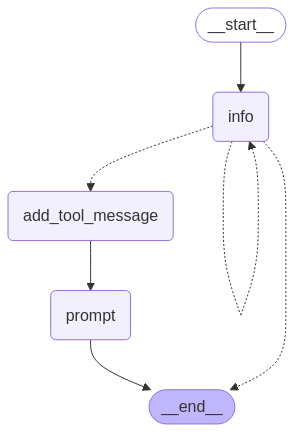

In [ ]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

## 테스트

In [ ]:
from langfuse.callback import CallbackHandler
import uuid

config = {
    "configurable": {"thread_id": str(uuid.uuid4())},
    "callbacks": [langfuse_handler]
}

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

# 무한 루프 시작
prev_node = ""
while True:
    try:
        print("\n***********************************************")
        # 사용자 입력 받기
        user = input("User (q/Q to quit): ")
    except:
        pass

    # 사용자 입력 출력
    print(f"\n[사용자] {user}")

    # 'q' 또는 'Q' 입력 시 루프 종료
    if user in {"q", "Q"}:
        print("AI: 다음에 또 만나요!")
        break

    inputs ={"messages": [HumanMessage(content=user)]}
    print("\n***********************************************")
    for chunk_msg, metadata in graph.stream(inputs, stream_mode="messages",
                                  config=config
                                ):
        print(chunk_msg.content, end="", flush=True)



***********************************************
User (q/Q to quit): RAG 프롬프트를 생성하고 싶습니다.

[사용자] RAG 프롬프트를 생성하고 싶습니다.

***********************************************
RAG 프롬프트를 생성하기 위해 몇 가지 정보를 더 필요로 합니다. 다음 질문에 답해 주시겠어요?

1. 프롬프트의 목적은 무엇인가요?
2. 프롬프트 템플릿에 전달될 변수는 무엇인가요?
3. 출력에서 하지 말아야 할 제약 조건은 무엇인가요?
4. 출력이 반드시 준수해야 할 요구 사항은 무엇인가요?
***********************************************
User (q/Q to quit): 프롬프트의 목적은 문서(PDF) 기반 RAG 프롬프트 작성이에요. 변수는 question, context 2가지 입니다. 출력에 욕설, 비속어, 성희롱 발언은 포함하지 않습니다.

[사용자] 프롬프트의 목적은 문서(PDF) 기반 RAG 프롬프트 작성이에요. 변수는 question, context 2가지 입니다. 출력에 욕설, 비속어, 성희롱 발언은 포함하지 않습니다.

***********************************************
추가로, 출력이 반드시 준수해야 할 요구 사항이 무엇인지 알려주실 수 있나요? 예를 들어, 특정 형식이나 길이 제한 등이 있을 수 있습니다.
***********************************************
User (q/Q to quit): 출력은 최대한 간결하게 해주세요. 한국어로 답변해 주세요. 그리고, 출처를 반드시 포함해 주세요

[사용자] 출력은 최대한 간결하게 해주세요. 한국어로 답변해 주세요. 그리고, 출처를 반드시 포함해 주세요

***********************************************
Prompt generated!Create a docum

# [예제: CRAG(Corrective RAG)](https://wikidocs.net/270686)
- Corrective-RAG(CRAG)는 검색된 문서에 대한 Self Refection / Self Grading을 포함하고 있는 RAG Strategy입니다.
- RAG로 부터 얻어진 문서를 이용해 답변을 생성하기 전에 knowledge refinement을 수행합니다.
- 이를 위해 문서를 knowledge strip으로 분할하고 평가(grade)하여 관련 없는 문서는 제외합니다.
- 모든 문서가 임계치 이하이거나 평가를 확신할 수 없는 경우에는 Knowledge Search를 하거나 웹 검색(Web search)를 수행합니다.

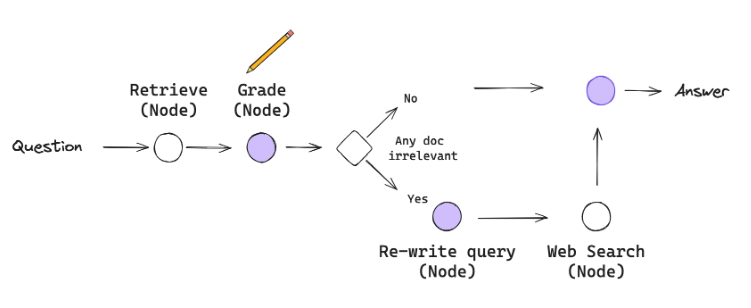

## Retriever

### Loader

In [ ]:
pdf_path = DATA_PATH+'SPRI_AI_Brief_2023년12월호_F.pdf'

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(pdf_path)

In [ ]:
docs = loader.load()
len(docs)

23

### Embedding

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

### Vector DB

In [ ]:
import faiss
from langchain_community.vectorstores import FAISS

In [ ]:
# DB 생성
db = FAISS.from_documents(
    documents=docs, embedding=embeddings)

In [ ]:
# 데이터베이스를 검색기로 사용하기 위해 retriever 변수에 할당
pdf_retriever = db.as_retriever()

In [212]:
# 질문 정의
question = "삼성전자가 개발한 생성AI 에 대해 설명하세요."

# 문서 검색
docs = pdf_retriever.invoke(question)
len(docs)

4

In [213]:
docs[0]

Document(id='e0e57f49-5ef4-4436-9799-36cb9ce8d393', metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'source': '/content/data/MyDrive/ai_lecture/5. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/5. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'moddate': '2023-12-08T13:28:38+09:00', 'trapped': '', 'modDate': "D:20231208132838+09'00'", 'creationDate': "D:20231208132838+09'00'", 'page': 12}, page_content='SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포

## 검색된 문서의 관련성 평가 (Question-Retrieval Evaluation)

In [210]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from pydantic import BaseModel, Field

# 모델 이름 가져오기
MODEL_NAME = "gpt-4o-mini"


# 검색된 문서의 관련성 여부를 이진 점수로 평가하는 데이터 모델
class GradeDocuments(BaseModel):
    """A binary score to determine the relevance of the retrieved document."""

    # 문서가 질문과 관련이 있는지 여부를 'yes' 또는 'no'로 나타내는 필드
    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )


# LLM 초기화
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)

# GradeDocuments 데이터 모델을 사용하여 구조화된 출력을 생성하는 LLM
structured_llm_grader = llm.with_structured_output(GradeDocuments)

In [211]:
# 시스템 프롬프트 정의
system = """
    You are a grader assessing relevance of a retrieved document to a user question. \n
    If the document contains keyword(s) or semantic meaning related to the question, grade it as relevant. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
"""

# 채팅 프롬프트 템플릿 생성
grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)

# Retrieval 평가기 초기화
retrieval_grader = grade_prompt | structured_llm_grader


In [214]:
# 검색된 문서 중 1번 index 문서의 페이지 내용을 추출
doc_txt = docs[0].page_content

# 검색된 문서와 질문을 사용하여 관련성 평가를 실행하고 결과 출력
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))


binary_score='yes'


## 답변 생성 체인

### prompt

In [215]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI


# LangChain Hub에서 RAG 프롬프트를 가져와 사용
prompt = hub.pull("teddynote/rag-prompt")

In [218]:
prompt.input_variables

['context', 'question']

In [217]:
print(prompt.template)

You are an AI assistant specializing in Question-Answering (QA) tasks within a Retrieval-Augmented Generation (RAG) system. 
Your primary mission is to answer questions based on provided context or chat history.
Ensure your response is concise and directly addresses the question without any additional narration.

###

Your final answer should be written concisely (but include important numerical values, technical terms, jargon, and names), followed by the source of the information.

# Steps

1. Carefully read and understand the context provided.
2. Identify the key information related to the question within the context.
3. Formulate a concise answer based on the relevant information.
4. Ensure your final answer directly addresses the question.
5. List the source of the answer in bullet points, which must be a file name (with a page number) or URL from the context. Omit if the source cannot be found.

# Output Format:
[Your final answer here, with numerical values, technical terms, jarg

### format_docs

In [219]:
# LLM 초기화
llm = ChatOpenAI(model_name=MODEL_NAME, temperature=0)


# 문서 포맷팅
def format_docs(docs):
    return "\n\n".join(
        [
            f'<document><content>{doc.page_content}</content><source>{doc.metadata["source"]}</source><page>{doc.metadata["page"]+1}</page></document>'
            for doc in docs
        ]
    )

In [220]:
format_docs(docs)

'<document><content>SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며, 생성 AI 모델을 다양한 제품에 \n단계적으로 탑재할 계획\nn 삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는 \n이미지 모델의 3개 모델로 구성\n∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며, 메일 작성, 문서 요약, 번역 업무의 \n처리를 지원\n∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이(code.i)’는 대화형 인터페이스로 서비스를 제공하며 \n사내 소프트웨어 개발에 최적화\n∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원하는 대로 바꿀 수 있도록 지원하며 \n저해상도 이미지의 고해상도 전환도 지원\nn IT 전문지 테크리퍼블릭(TechRepublic)은 온디바이스 AI가 주요 기술 트렌

### chain

In [221]:
# 체인 생성
rag_chain = prompt | llm | StrOutputParser()

In [222]:
# 체인 실행 및 결과 출력
generation = rag_chain.invoke({"context": format_docs(docs), "question": question})
print(generation)

삼성전자가 개발한 생성 AI '삼성 가우스'는 온디바이스에서 작동하며 언어, 코드, 이미지의 3개 모델로 구성되어 있습니다. 이 모델은 사용자 정보 유출 위험이 없고, 다양한 제품에 단계적으로 탑재될 예정입니다. 삼성 가우스는 텍스트 생성, 코드 생성, 이미지 생성 기능을 제공하며, 각각의 모델은 클라우드와 온디바이스에서 다양한 작업을 지원합니다.

**Source**
- SPRI_AI_Brief_2023년12월호_F.pdf (page 10)


## 쿼리 재작성(Question Re-writer)

In [223]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

# LLM 설정
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)

# Query Rewrite 시스템 프롬프트
system = """
You a question re-writer that converts an input question to a better version that is optimized
for web search. Look at the input and try to reason about the underlying semantic intent / meaning.
"""

# 프롬프트 정의
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)

# Question Re-writer 체인 초기화
question_rewriter = re_write_prompt | llm | StrOutputParser()


In [224]:
# 실행 및 결과 확인
print(f'[원본 질문]: "{question}"')
print("[쿼리 재작성]:", question_rewriter.invoke({"question": question}))


[원본 질문]: "삼성전자가 개발한 생성AI 에 대해 설명하세요."
[쿼리 재작성]: "삼성전자가 개발한 생성 AI의 특징과 기능에 대해 자세히 설명해 주세요."


## 웹 검색 도구

In [230]:
from langchain_community.tools import TavilySearchResults

# 최대 검색 결과를 3으로 설정
web_search_tool = TavilySearchResults(max_results=3)


In [231]:
# 웹 검색 도구 실행
results = web_search_tool.invoke({"query": question})
print(results)


[{'title': "삼성이 자체 개발한 생성형 AI '삼성 가우스' 첫 공개 - 조선일보", 'url': 'https://www.chosun.com/economy/tech_it/2023/11/08/IHCUCZUPXBCNDCCDYSA7NJFBHE/', 'content': '삼성전자가 자체 개발한 생성형 AI 삼성 가우스 소개 포스터. /삼성전자\n삼성전자가 자체 개발한 생성형 인공지능(AI) ‘삼성 가우스’를 드디어 공개했다.\n8일 삼성전자는 서울 서초구 서울R&D캠퍼스에서 열린 ‘삼성 AI 포럼 2023′ 행사에서 삼성리서치가 개발한 생성형 AI 모델 ‘삼성 가우스’를 처음으로 공개했다. 삼성 가우스라는 명칭은 정규분포 이론을 정립한 수학자 칼 프리드리히 가우스로부터 영감을 얻어 붙여졌다. 생성형 AI의 무한한 가능성을 의미한다고 삼성은 밝혔다.\n삼성의 첫 자체 제작 생성 AI ‘삼성 가우스’는 머신 러닝 기술을 기반으로 개발됐다. 크게 텍스트를 생성하는 언어 모델과, 코드를 생성하는 코드 모델, 이미지를 생성하는 이미지 모델 등 3가지로 구성됐다. [...] 실제 삼성은 당장 내년 스마트폰과 노트북에 생성 AI 기능을 탑재할 예정이다. 삼성전자는 지난달 31일 3분기 실적 발표에서 “내년 출시하는 스마트폰에 사용자들이 많이 쓰는 핵심 기능 위주로 생성형 AI 기술을 적용할 계획”이라고 밝혔다. 첫 적용 대상은 내년 초 출시할 프리미엄 스마트폰 신작 ‘갤럭시S24′가 될 예정이다.\n한편 삼성전자 내 반도체 사업을 담당하는 DS 부문은 삼성 가우스 대신 지난 8월 출시한 네이버클라우드의 기업용 AI 서비스 ‘뉴로클라우드 포 하이퍼클로바X’를 쓰는 방안을 추진하는 것으로 알려졌다. 컴퓨터 프로그래밍·문서작성 등에 AI를 활용하는 것이 목적이다. [...] 언어 모델은 문서 요약, 번역 등 업무를 더 쉽고 빠르게 처리할 수 있게 해준다. 코드 모델을 기반으로 개발된 AI 코딩 어시스턴트 ‘코드아이’는 사내 소프트웨어 개발에 활용될 예정이다. 개발자들이 쉽고 

## 그래프

### 상태(State)

In [232]:
from typing import Annotated, List
from typing_extensions import TypedDict


# 상태 정의
class GraphState(TypedDict):
    question: Annotated[str, "The question to answer"]
    generation: Annotated[str, "The generation from the LLM"]
    web_search: Annotated[str, "Whether to add search"]
    documents: Annotated[List[str], "The documents retrieved"]


### 노드

In [233]:
from langchain.schema import Document


# 문서 검색 노드
def retrieve(state: GraphState):
    print("\n==== RETRIEVE ====\n")
    question = state["question"]

    # 문서 검색 수행
    documents = pdf_retriever.invoke(question)
    return {"documents": documents}


# 답변 생성 노드
def generate(state: GraphState):
    print("\n==== GENERATE ====\n")
    question = state["question"]
    documents = state["documents"]

    # RAG를 사용한 답변 생성
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"generation": generation}


# 문서 평가 노드
def grade_documents(state: GraphState):
    print("\n==== [CHECK DOCUMENT RELEVANCE TO QUESTION] ====\n")
    question = state["question"]
    documents = state["documents"]

    # 필터링된 문서
    filtered_docs = []
    relevant_doc_count = 0

    for d in documents:
        # Question-Document 의 관련성 평가
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
        grade = score.binary_score

        if grade == "yes":
            print("==== [GRADE: DOCUMENT RELEVANT] ====")
            # 관련 있는 문서를 filtered_docs 에 추가
            filtered_docs.append(d)
            relevant_doc_count += 1
        else:
            print("==== [GRADE: DOCUMENT NOT RELEVANT] ====")
            continue

    # 관련 문서가 없으면 웹 검색 수행
    web_search = "Yes" if relevant_doc_count == 0 else "No"
    return {"documents": filtered_docs, "web_search": web_search}


# 쿼리 재작성 노드
def query_rewrite(state: GraphState):
    print("\n==== [REWRITE QUERY] ====\n")
    question = state["question"]

    # 질문 재작성
    better_question = question_rewriter.invoke({"question": question})
    return {"question": better_question}


# 웹 검색 노드
def web_search(state: GraphState):
    print("\n==== [WEB SEARCH] ====\n")
    question = state["question"]
    documents = state["documents"]

    # 웹 검색 수행
    docs = web_search_tool.invoke({"query": question})
    # 검색 결과를 문서 형식으로 변환
    web_results = "\n".join([d["content"] for d in docs])
    web_results = Document(page_content=web_results)
    documents.append(web_results)

    return {"documents": documents}


### 조건부 엣지에 활용할 함수

In [234]:
def decide_to_generate(state: GraphState):
    # 평가된 문서를 기반으로 다음 단계 결정
    print("==== [ASSESS GRADED DOCUMENTS] ====")
    # 웹 검색 필요 여부
    web_search = state["web_search"]

    if web_search == "Yes":
        # 웹 검색으로 정보 보강이 필요한 경우
        print(
            "==== [DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, QUERY REWRITE] ===="
        )
        # 쿼리 재작성 노드로 라우팅
        return "query_rewrite"
    else:
        # 관련 문서가 존재하므로 답변 생성 단계(generate) 로 진행
        print("==== [DECISION: GENERATE] ====")
        return "generate"


### 그래프 생성

In [235]:
from langgraph.graph import END, StateGraph, START

# 그래프 상태 초기화
workflow = StateGraph(GraphState)

# 노드 정의
workflow.add_node("retrieve", retrieve)
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)
workflow.add_node("query_rewrite", query_rewrite)
workflow.add_node("web_search_node", web_search)

# 엣지 연결
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "grade_documents")

# 문서 평가 노드에서 조건부 엣지 추가
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "query_rewrite": "query_rewrite",
        "generate": "generate",
    },
)

# 엣지 연결
workflow.add_edge("query_rewrite", "web_search_node")
workflow.add_edge("web_search_node", "generate")
workflow.add_edge("generate", END)


In [236]:
# 그래프 컴파일
app = workflow.compile()


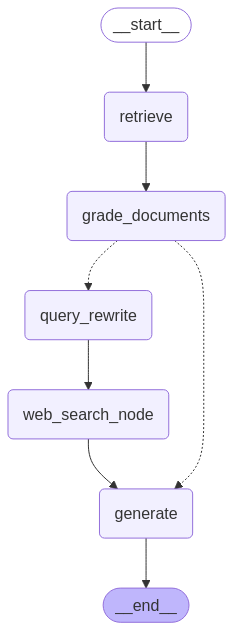

In [238]:
from IPython.display import Image, display
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

## 테스트

In [239]:
from langfuse.callback import CallbackHandler
import uuid

config = {
    "configurable": {"thread_id": str(uuid.uuid4())},
    "callbacks": [langfuse_handler]
}

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

# 입력 메시지 설정
inputs = {
    "question": "삼성전자가 개발한 생성형 AI 의 이름은?",
}

prev_node = ""
for chunk_msg, metadata in app.stream(inputs, stream_mode="messages",
                              config=config
                            ):
    curr_node = metadata['langgraph_node']
    if curr_node != prev_node:
      print("\n***********************************************")
      print(f"🔄 Node: \033[1;36m{curr_node}\033[0m 🔄")

    print(chunk_msg.content, end="", flush=True)
    prev_node = curr_node


==== RETRIEVE ====


==== [CHECK DOCUMENT RELEVANCE TO QUESTION] ====


***********************************************
🔄 Node: grade_documents 🔄
{"binary_score":"yes"}==== [GRADE: DOCUMENT RELEVANT] ====
{"binary_score":"no"}==== [GRADE: DOCUMENT NOT RELEVANT] ====
{"binary_score":"yes"}==== [GRADE: DOCUMENT RELEVANT] ====
{"binary_score":"no"}==== [GRADE: DOCUMENT NOT RELEVANT] ====
==== [ASSESS GRADED DOCUMENTS] ====
==== [DECISION: GENERATE] ====

==== GENERATE ====


***********************************************
🔄 Node: generate 🔄
삼성전자가 개발한 생성형 AI의 이름은 '삼성 가우스'입니다.

**Source**
- SPRI_AI_Brief_2023년12월호_F.pdf (page 10)

In [240]:
# 질문 입력
inputs = {
    "question": "2024년 노벨문학상 수상자의 이름은?",
}

prev_node = ""
for chunk_msg, metadata in app.stream(inputs, stream_mode="messages",
                              config=config
                            ):
    curr_node = metadata['langgraph_node']
    if curr_node != prev_node:
      print("\n***********************************************")
      print(f"🔄 Node: \033[1;36m{curr_node}\033[0m 🔄")

    print(chunk_msg.content, end="", flush=True)
    prev_node = curr_node


==== RETRIEVE ====


==== [CHECK DOCUMENT RELEVANCE TO QUESTION] ====


***********************************************
🔄 Node: grade_documents 🔄
{"binary_score":"no"}==== [GRADE: DOCUMENT NOT RELEVANT] ====
{"binary_score":"no"}==== [GRADE: DOCUMENT NOT RELEVANT] ====
{"binary_score":"no"}==== [GRADE: DOCUMENT NOT RELEVANT] ====
{"binary_score":"no"}==== [GRADE: DOCUMENT NOT RELEVANT] ====
==== [ASSESS GRADED DOCUMENTS] ====
==== [DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, QUERY REWRITE] ====

==== [REWRITE QUERY] ====


***********************************************
🔄 Node: query_rewrite 🔄
2024년 노벨 문학상 수상자는 누구인가요?
==== [WEB SEARCH] ====


==== GENERATE ====


***********************************************
🔄 Node: generate 🔄
2024년 노벨 문학상 수상자는 한국 소설가 한강입니다.

**Source**
- Document (page content)

# [예제: Self-RAG](https://wikidocs.net/270687)
- Self-RAG는 검색된 문서와 생성된 응답에 대한 자기 반성(self-reflection) 및 자기 평가(self-evaluation)를 포함한 RAG 전략으로, RAG 기반 시스템의 성능 향상에 기여할 수 있습니다.

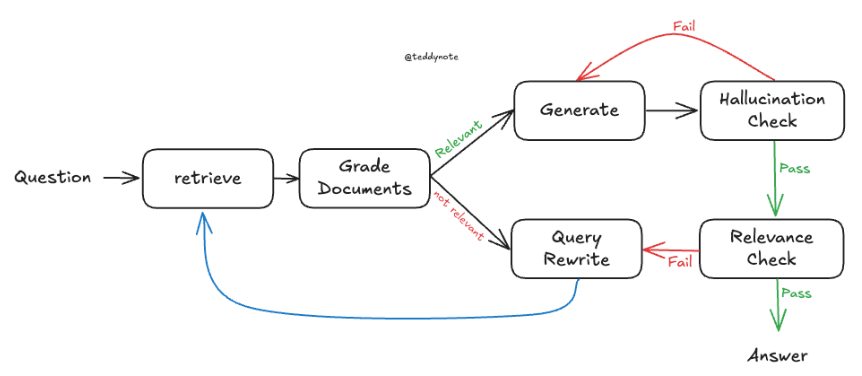

## Retriever

### Loader

In [ ]:
pdf_path = DATA_PATH+'SPRI_AI_Brief_2023년12월호_F.pdf'

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader(pdf_path)

In [ ]:
docs = loader.load()
len(docs)

23

### Embedding

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

### Vector DB

In [ ]:
import faiss
from langchain_community.vectorstores import FAISS

In [ ]:
# DB 생성
db = FAISS.from_documents(
    documents=docs, embedding=embeddings)

In [ ]:
# 데이터베이스를 검색기로 사용하기 위해 retriever 변수에 할당
pdf_retriever = db.as_retriever()

In [ ]:
# 질문 정의
question = "삼성전자가 개발한 생성형 AI 의 이름은?"

# 문서 검색
docs = pdf_retriever.invoke(question)
len(docs)

4

In [ ]:
docs[0]

Document(id='061acf4b-fadc-4051-b23f-a1cca3d86bf2', metadata={'producer': 'Hancom PDF 1.3.0.542', 'creator': 'Hwp 2018 10.0.0.13462', 'creationdate': '2023-12-08T13:28:38+09:00', 'source': '/content/data/MyDrive/ai_lecture/5. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/data/MyDrive/ai_lecture/5. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf', 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'moddate': '2023-12-08T13:28:38+09:00', 'trapped': '', 'modDate': "D:20231208132838+09'00'", 'creationDate': "D:20231208132838+09'00'", 'page': 12}, page_content='SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포

## 문서 검색 평가기 (Retrieval Grader)
- 추후 retrieve 노드에서 문서에 대한 관련성 평가를 진행하기 위해 미리 정의합니다.

In [ ]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# 최신모델 이름 설정
MODEL_NAME = "gpt-4o-mini"

# 데이터 모델 정의: 검색된 문서의 관련성을 이진 점수로 평가하기 위한 데이터 모델
class GradeDocuments(BaseModel):
    """A binary score to determine the relevance of the retrieved documents."""

    # 문서가 질문에 관련이 있는지 여부를 'yes' 또는 'no'로 나타내는 필드
    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )


# LLM 초기화
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)

# GradeDocuments 데이터 모델을 사용하여 LLM의 구조화된 출력 생성
structured_llm_grader = llm.with_structured_output(GradeDocuments)

In [ ]:
result = structured_llm_grader.invoke("대한민국의 수도는 서울이다.")

In [ ]:
result.binary_score

'yes'

In [ ]:
# 시스템 프롬프트 정의: 검색된 문서가 사용자 질문에 관련이 있는지 평가하는 시스템 역할 정의
system = """
  You are a grader assessing relevance of a retrieved document to a user question. \n
  It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
  If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
  Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
"""

# 채팅 프롬프트 템플릿 생성
grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)

# 검색 평가기 생성
retrieval_grader = grade_prompt | structured_llm_grader

In [ ]:
# 검색된 문서 중 두 번째 문서의 페이지 콘텐츠 추출
doc_txt = docs[0].page_content

print(f"question: {question} \n doc_txt: {doc_txt}")

question: 삼성전자가 개발한 생성형 AI 의 이름은? 
 doc_txt: SPRi AI Brief |  
2023-12월호
10
삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개
n 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 
AI 모델 ‘삼성 가우스’를 공개
n 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 
삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유
KEY Contents
£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원
n 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 
‘삼성 가우스’를 최초 공개
∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 
최적화된 크기의 모델 선택이 가능
∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, 
온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유
∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며, 생성 AI 모델을 다양한 제품에 
단계적으로 탑재할 계획
n 삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는 
이미지 모델의 3개 모델로 구성
∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며, 메일 작성, 문서 요약, 번역 업무의 
처리를 지원
∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이(code.i)’는 대화형 인터페이스로 서비스를 제공하며 
사내 소프트웨어 개발에 최적화
∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원하는 대로 바꿀 수 있도록 지원하며 
저해상도 이미지의 고해상도 전환도 지원
n IT 전문지 테크리퍼블릭(TechRepublic)은 온디바이스 AI가 주요 기술 트렌드

In [ ]:
# 검색 평가기 호출 및 결과 출력
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

binary_score='yes'


## 답변 생성 체인
- 답변 생성 체인은 검색된 문서를 기반으로 답변을 생성하는 체인입니다.

### Prompt

In [ ]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser

# LangChain Hub에서 프롬프트 가져오기
prompt = hub.pull("teddynote/rag-prompt")

In [ ]:
prompt.input_variables

['context', 'question']

In [ ]:
print(prompt.template)

You are an AI assistant specializing in Question-Answering (QA) tasks within a Retrieval-Augmented Generation (RAG) system. 
Your primary mission is to answer questions based on provided context or chat history.
Ensure your response is concise and directly addresses the question without any additional narration.

###

Your final answer should be written concisely (but include important numerical values, technical terms, jargon, and names), followed by the source of the information.

# Steps

1. Carefully read and understand the context provided.
2. Identify the key information related to the question within the context.
3. Formulate a concise answer based on the relevant information.
4. Ensure your final answer directly addresses the question.
5. List the source of the answer in bullet points, which must be a file name (with a page number) or URL from the context. Omit if the source cannot be found.

# Output Format:
[Your final answer here, with numerical values, technical terms, jarg

### 문서 포맷팅 함수

In [ ]:
# 문서 포맷팅 함수
def format_docs(docs):
    return "\n\n".join(
        [
            f'<document><content>{doc.page_content}</content><source>{doc.metadata["source"]}</source><page>{doc.metadata["page"]+1}</page></document>'
            for doc in docs
        ]
    )

In [ ]:
len(docs)

4

In [ ]:
format_docs(docs)

'<document><content>SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며, 생성 AI 모델을 다양한 제품에 \n단계적으로 탑재할 계획\nn 삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는 \n이미지 모델의 3개 모델로 구성\n∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며, 메일 작성, 문서 요약, 번역 업무의 \n처리를 지원\n∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이(code.i)’는 대화형 인터페이스로 서비스를 제공하며 \n사내 소프트웨어 개발에 최적화\n∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원하는 대로 바꿀 수 있도록 지원하며 \n저해상도 이미지의 고해상도 전환도 지원\nn IT 전문지 테크리퍼블릭(TechRepublic)은 온디바이스 AI가 주요 기술 트렌

### Chain

In [ ]:
# RAG 체인 생성
rag_chain = prompt | llm | StrOutputParser()

# 체인 실행
generation = rag_chain.invoke({"context": format_docs(docs), "question": question})
print(generation)

삼성전자가 개발한 생성형 AI의 이름은 '삼성 가우스'입니다.

**Source**
- /content/data/MyDrive/ai_lecture/5. Large Language Models/data/SPRI_AI_Brief_2023년12월호_F.pdf (page 10)


## 답변의 할루시네이션 여부를 평가
- groundedness_grader 를 생성하고 생성된 답변과 context 를 기반하여 답변의 할루시네이션 평가를 진행합니다.
- yes 인 경우 답변의 할루시네이션이 없을을 의미합니다. 반대로, no 인 경우 답변이 할루시네이션으라고 간주합니다.

In [ ]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI


# 데이터 모델 정의: 생성된 답변이 사실에 기반하고 있는지 여부를 이진 점수로 평가하기 위한 데이터 모델
class Groundednesss(BaseModel):
    """A binary score indicating whether the generated answer is grounded in the facts."""

    # 답변이 사실에 기반하고 있는지 여부를 'yes' 또는 'no'로 나타내는 필드
    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no'"
    )


# LLM 초기화
llm = ChatOpenAI(model=MODEL_NAME, temperature=0)

In [ ]:
# 구조화된 출력과 함께 LLM 설정
structured_llm_grader = llm.with_structured_output(Groundednesss)

# 시스템 프롬프트 정의
system = """
You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts. \n
Give a binary score 'yes' or 'no'. 'Yes' means that the answer is grounded in / supported by the set of facts.
"""

# 채팅 프롬프트 템플릿 생성
groundedness_checking_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
    ]
)

# 답변의 할루시네이션 평가기 생성
groundedness_grader = groundedness_checking_prompt | structured_llm_grader


In [ ]:
# 할루시네이션 평가기 호출(yes: 사실에 기반하고 있음, no: 사실에 기반하고 있지 않음)
groundedness_grader.invoke({"documents": format_docs(docs), "generation": generation})


Groundednesss(binary_score='yes')

## 답변의 관련성 평가
- 생성된 답변이 질문(question) 과의 관련성 있는 답변인지 여부를 평가합니다.
- yes 인 경우는 관련성 있음. no 인 경우는 관련성 없음을 의미합니다.

In [ ]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI


class GradeAnswer(BaseModel):
    """A binary score indicating whether the question is addressed."""

    # 답변의 관련성 평가: 'yes' 또는 'no'로 표기(yes: 관련성 있음, no: 관련성 없음)
    binary_score: str = Field(
        description="Answer addresses the question, 'yes' or 'no'"
    )
MODEL_NAME = "gpt-4o-mini"

llm = ChatOpenAI(model=MODEL_NAME, temperature=0)

In [ ]:
# llm 에 GradeAnswer 바인딩
structured_llm_grader = llm.with_structured_output(GradeAnswer)

# 시스템 프롬프트 정의
system = """
You are a grader assessing whether an answer addresses / resolves a question \n
Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question.
"""

# 프롬프트 생성
answer_grader_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "User question: \n\n {question} \n\n LLM generation: {generation}"),
    ]
)

# 답변 평가기 생성
answer_grader = answer_grader_prompt | structured_llm_grader


In [ ]:
# 답변 평가기 호출(yes: 질문을 해결함, no: 질문을 해결하지 않음)
answer_grader.invoke({"question": question, "generation": generation})


GradeAnswer(binary_score='yes')

## 질문 재작성기(Question Rewriter)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser


llm = ChatOpenAI(model=MODEL_NAME, temperature=0)

# 시스템 프롬프트 정의
# 입력 질문을 벡터스토어 검색에 최적화된 형태로 변환하는 시스템 역할 정의
system = """
You a question re-writer that converts an input question to a better version that is optimized \n
for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning.
"""

# 시스템 메시지와 초기 질문을 포함한 프롬프트 템플릿 생성
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)

# 질문 재작성기 생성
question_rewriter = re_write_prompt | llm | StrOutputParser()


In [ ]:
question

'삼성전자가 개발한 생성형 AI 의 이름은?'

In [ ]:
# 질문 재작성기 호출
question_rewriter.invoke({"question": question})


'삼성전자가 개발한 생성형 인공지능의 명칭은 무엇인가요?'

## 그래프

### 상태 정의

In [ ]:
from typing import List
from typing_extensions import TypedDict, Annotated


# 그래프의 상태를 나타내는 클래스 정의
class GraphState(TypedDict):
    # 질문을 나타내는 문자열
    question: Annotated[str, "Question"]
    # LLM에 의해 생성된 응답을 나타내는 문자열
    generation: Annotated[str, "LLM Generation"]
    # 문서의 목록을 나타내는 문자열 리스트
    documents: Annotated[List[str], "Retrieved Documents"]


### 노드 정의

In [ ]:
# 문서 검색
def retrieve(state:GraphState):
    print("==== [RETRIEVE] ====")
    question = state["question"]

    # 검색 수행
    documents = pdf_retriever.invoke(question)
    return {"documents": documents}


# 답변 생성
def generate(state:GraphState):
    print("==== [GENERATE] ====")
    question = state["question"]
    documents = state["documents"]

    # RAG 생성
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"generation": generation}


# 검색된 문서의 관련성 평가
def grade_documents(state:GraphState):
    print("==== [GRADE DOCUMENTS] ====")
    question = state["question"]
    documents = state["documents"]

    # 각 문서 점수 평가
    filtered_docs = []
    for d in documents:
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
        grade = score.binary_score
        if grade == "yes":
            print("==== GRADE: DOCUMENT RELEVANT ====")
            filtered_docs.append(d)
        else:
            print("==== GRADE: DOCUMENT NOT RELEVANT ====")
            continue
    return {"documents": filtered_docs}


# 질문 변환
def transform_query(state:GraphState):
    print("==== [TRANSFORM QUERY] ====")
    question = state["question"]

    # 질문 재작성
    better_question = question_rewriter.invoke({"question": question})
    return {"question": better_question}


### 조건부 엣지 정의

In [ ]:
# 답변 생성 여부 결정
def decide_to_generate(state:GraphState):
    print("==== [ASSESS GRADED DOCUMENTS] ====")
    state["question"]
    filtered_documents = state["documents"]

    if not filtered_documents:
        # 모든 문서가 관련성이 없는 경우
        # 새로운 쿼리 생성
        print(
            "==== [DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY] ===="
        )
        return "transform_query"
    else:
        # 관련 문서가 있는 경우 답변 생성
        print("==== [DECISION: GENERATE] ====")
        return "generate"


# 생성된 답변의 문서 및 질문과의 관련성 평가
def grade_generation_v_documents_and_question(state:GraphState):
    print("==== [CHECK HALLUCINATIONS] ====")
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]

    score = groundedness_grader.invoke(
        {"documents": documents, "generation": generation}
    )
    grade = score.binary_score

    # 환각 여부 확인
    if grade == "yes":
        print("==== [DECISION: GENERATION IS GROUNDED IN DOCUMENTS] ====")
        # 질문 해결 여부 확인
        print("==== [GRADE GENERATION vs QUESTION] ====")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score.binary_score
        if grade == "yes":
            print("==== [DECISION: GENERATION ADDRESSES QUESTION] ====")
            return "relevant"
        else:
            print("==== [DECISION: GENERATION DOES NOT ADDRESS QUESTION] ====")
            return "not relevant"
    else:
        print("==== [DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY] ====")
        return "hallucination"


### 그래프 생성

In [ ]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# 그래프 상태 초기화
workflow = StateGraph(GraphState)

# 노드 정의
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generatae
workflow.add_node("transform_query", transform_query)  # transform_query

# 엣지 정의
workflow.add_edge(START, "retrieve")
workflow.add_edge("retrieve", "grade_documents")

# 문서 평가 노드에서 조건부 엣지 추가
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)

# 엣지 정의
workflow.add_edge("transform_query", "retrieve")

# 답변 생성 노드에서 조건부 엣지 추가
workflow.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question,
    {
        "hallucination": "generate",
        "relevant": END,
        "not relevant": "transform_query",
    },
)

In [ ]:
# 그래프 컴파일
app = workflow.compile(checkpointer=MemorySaver())


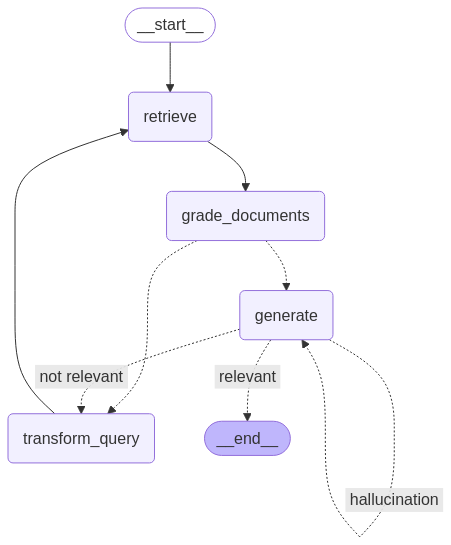

In [ ]:
from IPython.display import Image, display
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

## 테스트

In [ ]:
from langfuse.callback import CallbackHandler
import uuid

config = {
    "configurable": {"thread_id": str(uuid.uuid4())},
    "callbacks": [langfuse_handler]
}

# Initialize Langfuse CallbackHandler for Langchain (tracing)
langfuse_handler = CallbackHandler()

# 입력 메시지 설정
inputs = {
    "question": "삼성전자가 개발한 생성형 AI 의 이름은?",
}

prev_node = ""
for chunk_msg, metadata in app.stream(inputs, stream_mode="messages",
                              config=config
                            ):
    curr_node = metadata['langgraph_node']
    if curr_node != prev_node:
      print("\n***********************************************")
      print(f"🔄 Node: \033[1;36m{curr_node}\033[0m 🔄")

    print(chunk_msg.content, end="", flush=True)
    prev_node = curr_node

==== [RETRIEVE] ====
==== [GRADE DOCUMENTS] ====

***********************************************
🔄 Node: grade_documents 🔄
{"binary_score":"yes"}==== GRADE: DOCUMENT RELEVANT ====
{"binary_score":"no"}==== GRADE: DOCUMENT NOT RELEVANT ====
{"binary_score":"yes"}==== GRADE: DOCUMENT RELEVANT ====
{"binary_score":"no"}==== GRADE: DOCUMENT NOT RELEVANT ====
==== [ASSESS GRADED DOCUMENTS] ====
==== [DECISION: GENERATE] ====
==== [GENERATE] ====

***********************************************
🔄 Node: generate 🔄
삼성전자가 개발한 생성형 AI의 이름은 '삼성 가우스'입니다.

**Source**
- SPRI_AI_Brief_2023년12월호_F.pdf (page 10)==== [CHECK HALLUCINATIONS] ====
{"binary_score":"yes"}==== [DECISION: GENERATION IS GROUNDED IN DOCUMENTS] ====
==== [GRADE GENERATION vs QUESTION] ====
{"binary_score":"yes"}==== [DECISION: GENERATION ADDRESSES QUESTION] ====
